In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer, OneHotEncoder
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
data = pd.read_csv('train.txt', usecols=range(1, 15), names=('x{}'.format(i) for i in range(14)), skiprows=1)
test = pd.read_csv('test.txt', usecols=range(1, 15), names=('x{}'.format(i) for i in range(14)), skiprows=1)
labels = pd.read_csv('target_train.txt')
labels = labels[1:]
labels = np.array(labels['target'])

In [3]:
print (type(enumerate(np.array(data.head(1))[0])))
text_feature_indexs = []
for index, value in enumerate(np.array(data.head(1))[0]):
    if not np.isreal(value):
        text_feature_indexs.append(index)
        
print (text_feature_indexs)

<class 'enumerate'>
[1, 3, 5, 6, 7, 8, 9, 13]


In [4]:
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,28,Private,37821,Assoc-voc,11,Never-married,Sales,Unmarried,White,Female,0,0,55,?
1,45,Private,228570,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,35,United-States
2,21,Private,141453,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
3,34,Private,88215,Masters,14,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0,0,40,China
4,53,Private,48641,12th,8,Never-married,Other-service,Not-in-family,Other,Female,0,0,35,United-States


In [5]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [6]:
common_data = data
common_data = common_data.append(test)

In [7]:
def categorial_string_to_numbers(values):
    uniq_values = set(values)
    values_to_num = dict(zip(values, range(len(values))[::-1]))
    return map(lambda x: values_to_num[x], values)

In [8]:
for i in text_feature_indexs:
    common_data['x{}'.format(i)] = list(categorial_string_to_numbers(common_data['x{}'.format(i)]))

In [9]:
pd.DataFrame(common_data)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,39,11,77516,22,13,1,1,5,0,1,2174,0,40,0
1,50,10,83311,22,13,0,0,3,0,1,0,0,13,0
2,38,1,215646,0,9,11,9,5,0,1,0,0,40,0
3,53,1,234721,38,7,0,9,3,19,1,0,0,40,0
4,28,1,338409,22,13,0,12,0,19,0,0,0,40,653
5,37,1,284582,6,14,0,0,0,0,0,0,0,40,0
6,49,1,160187,59,5,104,16,5,19,0,0,0,16,331
7,52,10,209642,0,9,0,0,3,0,1,0,0,45,0
8,31,1,45781,6,14,1,12,5,0,0,14084,0,50,0
9,42,1,159449,22,13,0,0,3,0,1,5178,0,40,0


In [10]:
common_data_ohe = OneHotEncoder(categorical_features=text_feature_indexs).fit_transform(common_data)

In [11]:
common_data_ohe

<32561x108 sparse matrix of type '<class 'numpy.float64'>'
	with 394963 stored elements in COOrdinate format>

In [12]:
common_data_dense = common_data_ohe.todense()

In [13]:
common_data_dense

matrix([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           2.17400000e+03,   0.00000000e+00,   4.00000000e+01],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   1.30000000e+01],
        [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   4.00000000e+01],
        ..., 
        [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   4.00000000e+01],
        [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   2.00000000e+01],
        [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           1.50240000e+04,   0.00000000e+00,   4.00000000e+01]])

In [14]:
X_train = common_data_dense[:22561]
X_test = common_data_dense[22561:32561]
y_train = labels

In [15]:
X_train.shape

(22561, 108)

# Обучаем модельки

In [16]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

param = {'objective':'multi:softmax', 'bst:max_depth':3, 'bst:eta':0.1, 'silent':1, 'nthread':4, 'num_class':7}
plst = param.items()

In [17]:
def xgboost_accuracy_scores(sample, true_targets): 
    return np.array([accuracy_score(true_targets,
                                    model.predict(sample, ntree_limit=n + 1)) 
                     for n in range(num_boost_round)])

In [18]:
%%time
num_boost_round = 100
model = xgb.train(plst, dtrain, num_boost_round=num_boost_round)

CPU times: user 17.8 s, sys: 136 ms, total: 17.9 s
Wall time: 4.89 s


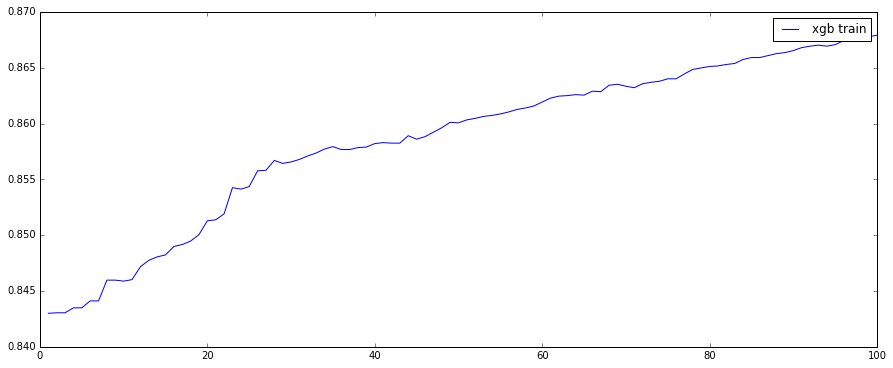

In [20]:
xgb_scores_train = xgboost_accuracy_scores(dtrain, y_train)

plt.figure(figsize=(15, 6))
plt.plot(np.arange(len(xgb_scores_train)) + 1, xgb_scores_train, label='xgb train')
plt.legend()
plt.show()

In [21]:
%%time
num_boost_round = 1000
model = xgb.train(plst, dtrain, num_boost_round=num_boost_round)

CPU times: user 2min 58s, sys: 2.08 s, total: 3min
Wall time: 50 s


In [23]:
ans = model.predict(dtest)

with open ('resultsV2', 'w') as f:
    f.write('id,target\n')
    for i in range(10000):
        f.write(str(22562 + i) + ',' + str(int(ans[i])) + '\n')

In [24]:
sum(ans)/len(ans)

0.2054